# Первое задание. Кызыл-оол К., 772 группа

Код домашнего задания можно такжй найти в репозитории: https://github.com/Kyzyl-ool/MachineLearningSeminars

Для начала необходимо убедиться, что библиотеки ниже установлены:

In [1]:
# [Библиотеки для работы с данными]
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# [Визуализация данных]
import seaborn as sns
from matplotlib import pyplot as plt

# [Конфигурация моделей]
import config

# [Библиотеки для обучения моделей]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
shuffle_count = config.shuffle_count

In [3]:
dataset = pd.read_csv('spambase/spambase.data', header=None,
            names=config.names)

dataset.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
2367,0.00,0.0,0.00,0.0,1.43,0.00,0.0,0.0,0.0,0.00,...,0.000,0.138,0.000,0.000,0.000,0.00,1.863,5,41,0
3555,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.66,...,0.000,0.000,0.265,0.000,0.000,0.00,3.850,26,77,0
1486,0.16,0.0,0.24,0.0,1.63,0.49,0.0,0.0,0.0,0.16,...,0.014,0.058,0.000,0.000,0.232,0.00,1.725,10,333,1
3417,0.00,0.0,0.32,0.0,0.32,0.00,0.0,0.0,0.0,0.00,...,0.000,0.040,0.000,0.000,0.000,0.00,1.902,10,175,0
418,0.00,0.0,0.15,0.0,0.15,0.00,0.0,0.0,0.0,0.00,...,0.000,0.051,0.000,0.255,0.076,0.46,6.300,37,1216,1


Всего имеем 58 признаков, из которых 57 количественных и 1 бинарный

## Описание признаков:


| Название признака | Тип | Принимаемые значения | Описание |
|-------------------|-----|----------------------|----------|
| word_freq_{WORD} | Количественный | $[0; 100]$ | Показывает долю вхождений слова {WORD} в письме в процентах
| char_freq_{CHAR} | Количественный | $[0; 100]$ | Показывает долю вхождений символа {CHAR} в письме в процентах
| capital_run_length_average | Количественный | $ [1; \infty) $ | Средняя длина непрерывных последовательностей заглавных букв
| capital_run_length_longest | Количественный | $ [1; \infty) $ | Максимальная длина непрерывной последовательности заглавных букв
| capital_run_length_total | Количественный | $ [1; \infty) $ | Суммарное количество заглавных букв в письме
| spam | Бинарный | $ \{0; 1\} $ | Является ли письмо спамом (1 - спам, 0 - не спам)

Построим гистограммы для визуализации данных:

__Внимание: должнен быть установлен seaborn версии 0.11__

In [ ]:
for i in config.names:
    sns.jointplot(
        data=dataset,
        x=config.names[4],
        y=i,
        hue='spam'
)

Наиболее интересные пары:

(3d, credit, 000, hp, hpl, george, 650, lab, labs, telnet, 857, data, 415, 85, project, re, edu, table, conference, $) - make

(3d, remove, receive, addresses, free, credit, 000, hp, 650, cs, meeting, original, $, # _average, _longest, ) - address

(3d, remove, all, order, all, addresses, free, business, credit, font, 000, hp, george, 650, lab, labs, telnet, 857, $, #, _average, _longest, _total, ) - all

(our, remove, internet, order, mail, receive, will, people, report, addresses, free, business, email, you, credit, your, 000, money, hp) - 3d

(remove, addresses, business, credit, 000, money, !, $ , # _average, _longest, _total) - out

Визуальный анализ пар признков на диаграмме рассеяния показывает, что:
- На подавляющем большинстве пар невозможно выделить отдельным кластером письма, помеченные спамом. Лишь на некоторых диаграммах можно провести разделяющую плоскость.
- Некоторые признаки (word_freq_650, word_freq_george, capital_run_length_average и прочие) могут четко сказать, является ли письмо спамом.

# Выполним препроцессинг данных:

Для этого проведем:
- Нормировку данных
- Разделение выборки на train и test в соотношении 1:1


## Нормировка данных на единицу

In [4]:
# Данные, которые будем нормировать по максимальному значению
to_normalize = [
    'capital_run_length_average',
    'capital_run_length_longest',
    'capital_run_length_total',
]

maximum = {}


for i in to_normalize:
    maximum[i] = dataset[i].max()
    dataset[i] = dataset[i] / maximum[i]



In [5]:
# Данные, которые будем нормировать, деля на 100
to_normalize_100 = [
    'word_freq_make',
    'word_freq_address',
    'word_freq_all',
    'word_freq_3d',
    'word_freq_our',
    'word_freq_over',
    'word_freq_remove',
    'word_freq_internet',
    'word_freq_order',
    'word_freq_mail',
    'word_freq_receive',
    'word_freq_will',
    'word_freq_people',
    'word_freq_report',
    'word_freq_addresses',
    'word_freq_free',
    'word_freq_business',
    'word_freq_email',
    'word_freq_you',
    'word_freq_credit',
    'word_freq_your',
    'word_freq_font',
    'word_freq_000',
    'word_freq_money',
    'word_freq_hp',
    'word_freq_hpl',
    'word_freq_george',
    'word_freq_650',
    'word_freq_lab',
    'word_freq_labs',
    'word_freq_telnet',
    'word_freq_857',
    'word_freq_data',
    'word_freq_415',
    'word_freq_85',
    'word_freq_technology',
    'word_freq_1999',
    'word_freq_parts',
    'word_freq_pm',
    'word_freq_direct',
    'word_freq_cs',
    'word_freq_meeting',
    'word_freq_original',
    'word_freq_project',
    'word_freq_re',
    'word_freq_edu',
    'word_freq_table',
    'word_freq_conference',
    'char_freq_;',
    'char_freq_(',
    'char_freq_[',
    'char_freq_!',
    'char_freq_$',
    'char_freq_#',
]

maximum_100 = {}

for i in to_normalize_100:
    maximum_100[i] = dataset[i].max()
    dataset[i] = dataset[i] / maximum_100[i]

In [6]:
# Имеем нормированные на единицу данные:
dataset.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4458,0.055066,0.0,0.100000,0.0,0.000,0.042517,0.0,0.000000,0.0,0.006601,...,0.004333,0.001948,0.0,0.000000,0.006330,0.0,0.001489,0.001702,0.013067,0
1433,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.017432,0.0,0.015703,0.056638,0.0,0.003411,0.002303,0.004987,1
2749,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.001058,0.000200,0.001326,0
2266,0.000000,0.0,0.166667,0.0,0.000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.010192,0.000000,0.0,0.001671,0.000601,0.002209,0
1364,0.000000,0.0,0.000000,0.0,0.126,0.000000,0.0,0.113411,0.0,0.000000,...,0.000000,0.042145,0.0,0.028512,0.000000,0.0,0.003227,0.002503,0.007638,1


## Получение обучающей и тестовой выборки

In [7]:
X = dataset.iloc[:, dataset.columns != 'spam'].values
Y = dataset.iloc[:, dataset.columns == 'spam'].values.reshape(-1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=len(X)//2,
                                                    shuffle=True
                                                   )

In [8]:
print('Кол-во спам-писем в обучающей выборке: {}'.format(Y_train.sum()))
print('Кол-во спам-писем в тестовой выборке: {}'.format(Y_test.sum()))

Кол-во спам-писем в обучающей выборке: 900
Кол-во спам-писем в тестовой выборке: 913


# Эксперименты

Будем экспериментировать с методами
- k ближайших соседей (kNN)
- Метод опорных векторов (SVM)

Каждая построенная модель будет прогоняться несколько раз (shuffle_count раз) на различных данных для оценки стабильности модели обучения.
Данные перед каждым обучением будут перемешиваться


## k ближайших соседей


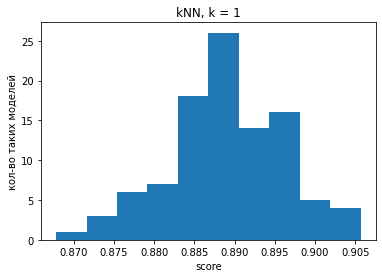

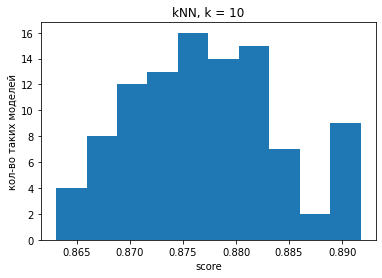

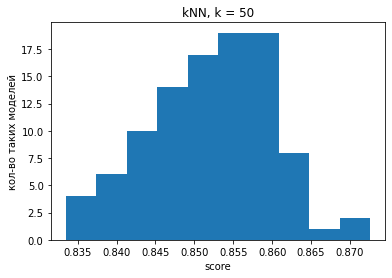

In [9]:
scores = []

for k in [1, 10, 50]:
    for i in range(shuffle_count):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=len(X)//2,
                                                        shuffle=True
                                                       )
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, Y_train)
        scores.append(model.score(X_test, Y_test))
    plt.title('kNN, k = {}'.format(k))
    plt.hist(np.array(scores))
    plt.xlabel('score')
    plt.ylabel('кол-во таких моделей')
    plt.show()
    scores.clear()

## k взвешенных ближайших соседей

In [10]:
# Определим функцию для весов, линейно убывающих с номером соседа:
def func(distance):
    ret = np.ones_like(distance)
    k = ret.shape[1]
    for i in range(k):
        ret[:, i] *= (k-i)/k
    return ret

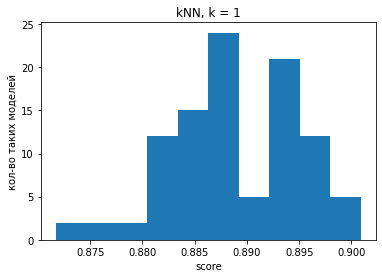

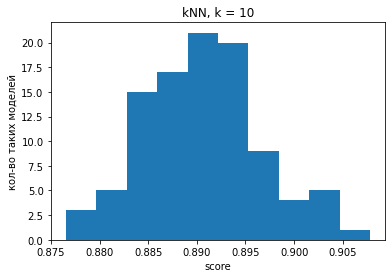

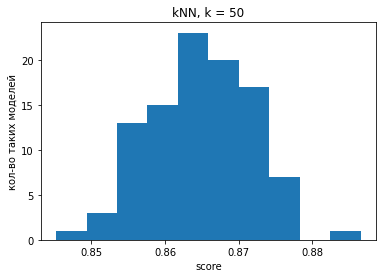

In [11]:
scores = []

for k in [1, 10, 50]:
    for i in range(shuffle_count):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=len(X)//2,
                                                        shuffle=True
                                                       )
        model = KNeighborsClassifier(n_neighbors=k, weights=func)
        model.fit(X_train, Y_train)
        scores.append(model.score(X_test, Y_test))
    plt.title('kNN, k = {}'.format(k))
    plt.hist(np.array(scores))
    plt.xlabel('score')
    plt.ylabel('кол-во таких моделей')
    plt.show()
    scores.clear()

## kNN со взвешенными весами, обратно пропорционально расстоянию

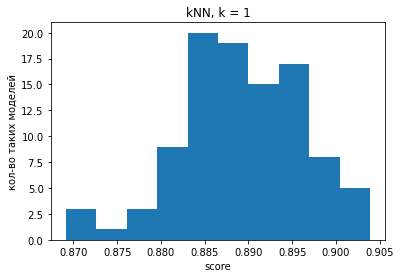

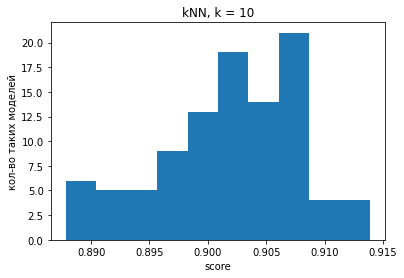

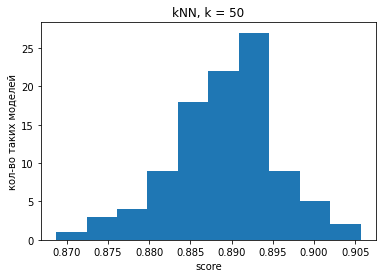

In [12]:
scores = []

for k in [1, 10, 50]:
    for i in range(shuffle_count):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=len(X)//2,
                                                        shuffle=True
                                                       )
        model = KNeighborsClassifier(n_neighbors=k, weights='distance')
        model.fit(X_train, Y_train)
        scores.append(model.score(X_test, Y_test))
    plt.title('kNN, k = {}'.format(k))
    plt.hist(np.array(scores))
    plt.xlabel('score')
    plt.ylabel('кол-во таких моделей')
    plt.show()
    scores.clear()

## Метод парзеновского окна

Выберем функцию ядра $K$:

$$ K(r) = \text{ReLU}(1 - r^2) $$

In [13]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

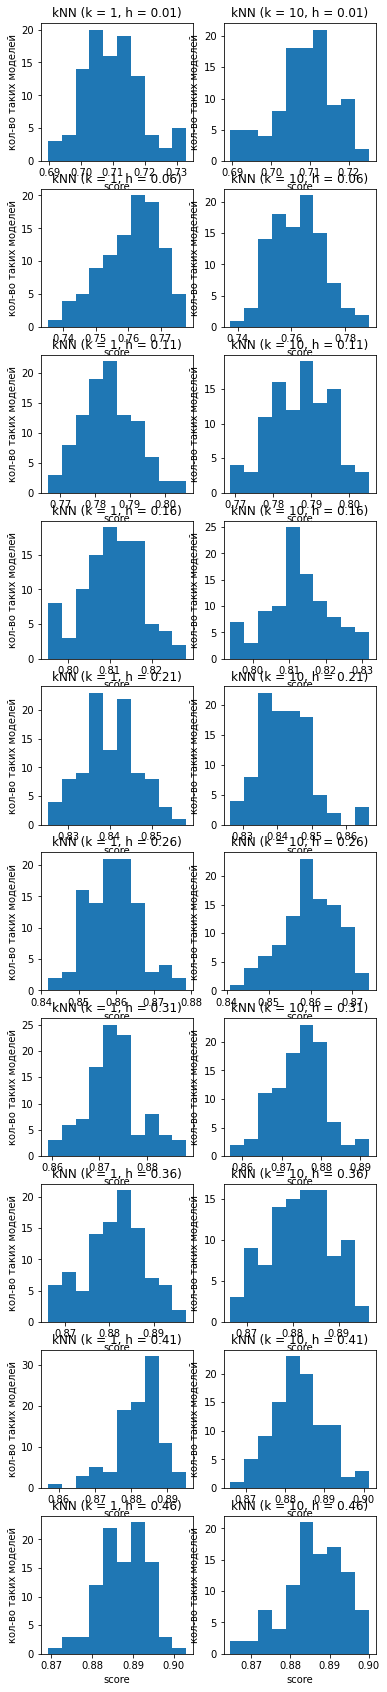

In [15]:
scores = []

H = np.arange(0.01, 0.5, 0.05)
Ks = [1, 10]

fig, axs = plt.subplots(len(H), len(Ks))
fig.set_figheight(35)


for i, h in enumerate(H):
    for j, k in enumerate(Ks):
        for _ in range(shuffle_count):
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                            test_size=len(X)//2,
                                                            shuffle=True
                                                           )
            model = KNeighborsClassifier(n_neighbors=k, weights=lambda x: K(x, h=h))
            model.fit(X_train, Y_train)
            scores.append(model.score(X_test, Y_test))
        # plt.title('kNN (k = {}, h = {:.2f})'.format(k, h))
        axs[i, j].set_title('kNN (k = {}, h = {:.2f})'.format(k, h))
        axs[i, j].hist(np.array(scores))
        axs[i, j].set_xlabel('score')
        axs[i, j].set_ylabel('кол-во таких моделей')
        scores.clear()

##  Метод опорных векторов

Виды используемых ядер:

linear: $ \langle x, y \rangle $

poly: $ ( \gamma \langle x, y \rangle + r )^d    $

rbf: $ \exp( -\beta \parallel x - y \parallel^2 ) $

sigmoid: $\text{tanh}(\gamma \langle x, y \rangle + r  )$

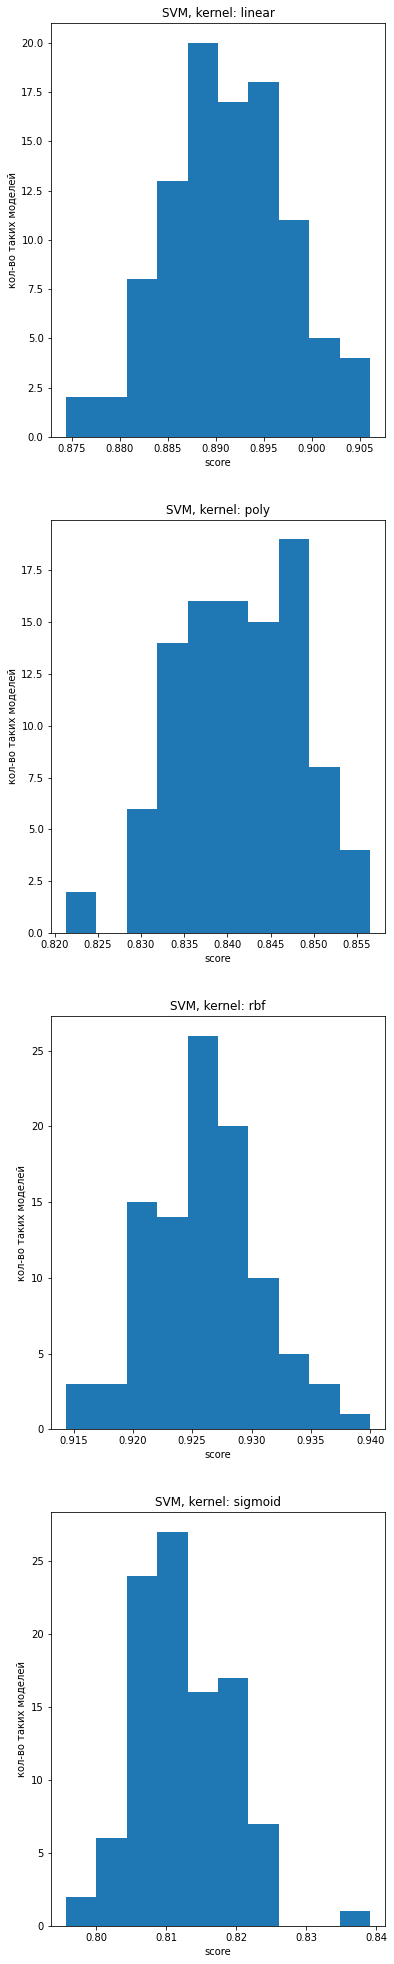

In [16]:
# Рассмотрим модели на различных ядрах
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []
fig, axs = plt.subplots(len(kernels))
fig.set_figheight(35)

for i, kernel in enumerate(kernels):
    for _ in range(shuffle_count):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=len(X)//2,
                                                        shuffle=True
                                                       )
        model = SVC(kernel=kernel)
        model.fit(X_train, Y_train)
        scores.append(model.score(X_test, Y_test))
    axs[i].set_title('SVM, kernel: {}'.format(kernel))
    axs[i].hist(np.array(scores))
    axs[i].set_xlabel('score')
    axs[i].set_ylabel('кол-во таких моделей')
    scores.clear()

Положим

$$ \text{kernel}(x, y) = 9\langle x, y \rangle^3 + 100\langle x, y \rangle^2 + 998\langle x, y \rangle \;\;\;\; (\star) $$

In [9]:
# Возъмем свое ядро:
def kernel(X1, X2):
    Q = X1@X2.T
    return 9*Q**3 + 100*Q**2 + 998*Q

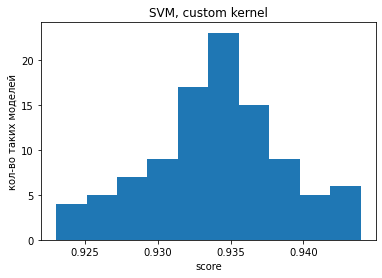

In [137]:
scores = []

for _ in range(shuffle_count):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=len(X)//2,
                                                    shuffle=True
                                                   )
    model = SVC(kernel=kernel)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title('SVM, custom kernel')
plt.hist(np.array(scores))
plt.xlabel('score')
plt.ylabel('кол-во таких моделей')
plt.show()
scores.clear()

# Выводы и обсуждения

Были проведены эксперименты с методами:
- простейший kNN
- взвешенный kNN с весами обратно пропорционально расстоянию
- взвешенный kNN с весами, линейно убывающими по номеру соседа
- метод парзеновского окна
- метод опорных векторов с линейным ядром
- метод опорных векторов с полиномиальным ядром $3$ степени
- метод опорных векторов с ядром rbf (радиальная базисная функция)
- метод опорных векторов с сигмоидальным ядром

Для каждого метода было проведено $100$ экспериментов с растасованными выборками. Итоговые результаты были аггрегированы в гистограммы

Краткие выводы:

- Простейший kNN дает $\mathbb{E}\{score\} = 0.85 \div 0.89 $
- kNN с линейно убывающими весами: $\mathbb{E}\{score\} = 0.86 \div 0.89  $
- kNN с весами, обратно пропорциональными расстоянию до соседа: $ \mathbb{E}\{score\} = 0.885 \div 0.90 $
- Метод Парзеновского окна при $h$ от $0.01$ до $0.5$ дает $\mathbb{E}\{score\} = 0.7 \div 0.89 $
- SVM с линейным ядром: $\mathbb{E} \{score\} = 0.89 $
- SVM с полиномиальным ядром 3 степени: $ \mathbb{E}\{score\} = 0.84 $
- SVM с радиальной базисной функцией: $ \mathbb{E}\{score\} = 0.925 $
- SVM с сигмоидальным ядром: $ \mathbb{E}\{score\} = 0.81 $
- SVM с ядром вида $(\star)$: $ \mathbb{E}\{score\} = 0.93 $

### Какая модель лучше?

Можно говорить о том, что метод опорных векторов для задачи классификации писем подходит лучше, чем метод $k$ ближайших соседей. Выбор rbf-функции в качестве ядра в методе SVM – верный шаг для улучшения качества модели.

### С какими проблемами столкнулись?

- Была проблема с визуализацией данных через seaborn.jointplot: во-первых, требуется версия 0.11, которая не поддерживается jupyter-notebook'ом, во-вторых, эта визуализация данных стоит очень дорого по оперативной памяти (наступит момент, когда ядро будет занимать больше 2Гб).
- Довольно долго собираются данные для модели. При shuffle_count = 100 весь ноутбук работает примерно 15 минут.

### Совпадают ли полученные результаты с ожидаемыми?



Ранее этот датасет использовался в компнаии HP для фильтрации спама. Используемая ими модель давала ложные ответы в 7% случаях, что вполне согласуется с достигнутым score в 93%

Посмотрим, какой классификатор дает меньше ложно-положительных срабатываний (модель пометила спамом письмо, которое на самом деле таковым не является):

In [99]:
def count_misclassification(model, X_test, Y_test):
    misclassification = 0

    for i, prediction in enumerate(model.predict(X_test)):
        if Y_test[i] == 0 and prediction == 1:
            misclassification += 1
    
    return misclassification

In [134]:
# Возъмем свое ядро:
def kernel(X1, X2):
    Q = X1@X2.T
    return 9*Q**3 + 100*Q**2 + 998*Q

In [135]:
models = [
    {
        'name': 'SVM poly',
        'model': SVC(kernel='poly'),
    },
    {
        'name': 'SVM linear',
        'model': SVC(kernel='linear'),
    },
    {
        'name': 'SVM rbf',
        'model': SVC(kernel='rbf'),
    },
    {
        'name': 'SVM custom kernel',
        'model': SVC(kernel=kernel)
    },
    {
        'name': 'kNN, k = 1',
        'model': KNeighborsClassifier(n_neighbors=1),
    },
    {
        'name': 'kNN, k = 10',
        'model': KNeighborsClassifier(n_neighbors=10)
    }
]

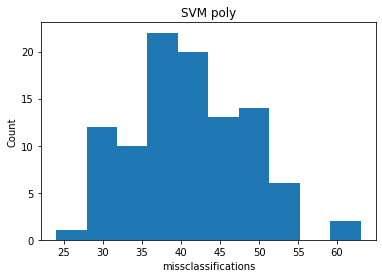

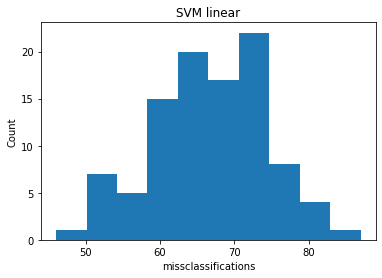

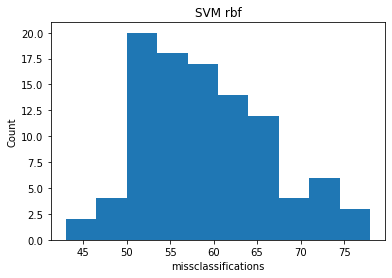

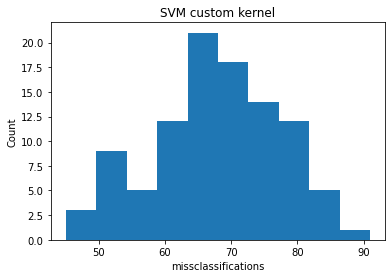

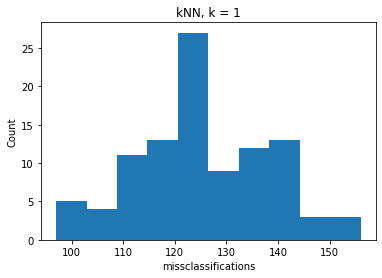

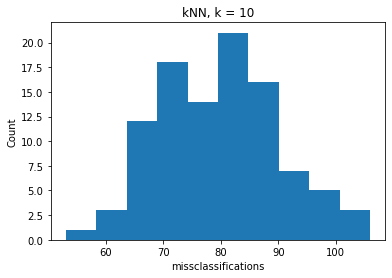

In [136]:
for model in models:
    misses = []
    for _ in range(shuffle_count):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=len(X)//2,
                                                        shuffle=True
                                                       )
        misses.append(count_misclassification(model['model'].fit(X_train, Y_train), X_test, Y_test))

    plt.hist(misses)
    plt.xlabel('missclassifications')
    plt.ylabel('Count')
    plt.title(model['name'])
    plt.show()

SVM с полиномиальным ядром 3 степени выдал около 4% ложно-положительных срабатываний